In [8]:
import polars as pl 
import matplotlib.pyplot as plt

def NormalizeData(data, min, max):
    return (data - min) / (max - min)


magnitude = 11 #7.5 # most humans can only see this

pi = 3.14159265358
df = pl.read_csv("../data/gaia-mag-lt-9.csv", has_header=True)
df  = df.filter(pl.col("b1mag") < magnitude)
df = df.sort('b1mag') #,descending=True)
max = df.select(pl.max('b1mag'))
min = df.select(pl.min('b1mag'))

df = df.with_columns([
    (pl.col('ra') * pi / 180).alias("ra_radians"),
    (pl.col('dec') * pi / 180).alias("dec_radians"),
    ( ((pl.col('b1mag') - min) / (max - min)) + 1).alias("mag_norm")
])

df = df.with_columns([
    (pl.col("dec_radians").cos() * pl.col("ra_radians").cos()).alias("x"),
    (pl.col("dec_radians").cos() * pl.col("ra_radians").sin()).alias("y"),
    (pl.col("dec_radians").sin() ).alias("z")
])
display(df.sort("b1mag", descending=True))

df.select(pl.count())

shape: (121_331, 9)
┌────────────┬────────────┬───────┬────────────┬───┬──────────┬───────────┬───────────┬───────────┐
│ ra         ┆ dec        ┆ b1mag ┆ ra_radians ┆ … ┆ mag_norm ┆ x         ┆ y         ┆ z         │
│ ---        ┆ ---        ┆ ---   ┆ ---        ┆   ┆ ---      ┆ ---       ┆ ---       ┆ ---       │
│ f64        ┆ f64        ┆ f64   ┆ f64        ┆   ┆ f64      ┆ f64       ┆ f64       ┆ f64       │
╞════════════╪════════════╪═══════╪════════════╪═══╪══════════╪═══════════╪═══════════╪═══════════╡
│ 58.345524  ┆ -73.948649 ┆ 8.99  ┆ 1.018321   ┆ … ┆ 2.0      ┆ 0.145105  ┆ 0.235364  ┆ -0.961014 │
│ 162.198568 ┆ -80.161425 ┆ 8.99  ┆ 2.830899   ┆ … ┆ 2.0      ┆ -0.162692 ┆ 0.052239  ┆ -0.985293 │
│ 103.56751  ┆ -68.95528  ┆ 8.99  ┆ 1.807594   ┆ … ┆ 2.0      ┆ -0.084241 ┆ 0.349076  ┆ -0.9333   │
│ 1.479458   ┆ -68.811598 ┆ 8.99  ┆ 0.025821   ┆ … ┆ 2.0      ┆ 0.361315  ┆ 0.009332  ┆ -0.932397 │
│ …          ┆ …          ┆ …     ┆ …          ┆ … ┆ …        ┆ …         ┆ …         ┆ …         │
│ 219.899787 ┆ -60.835273 ┆ 0.0   ┆ 3.837975   ┆ … ┆ 1.142993 ┆ -0.373858 ┆ -0.312591 ┆ -0.873222 │
│ 213.915319 ┆ 19.18245   ┆ 0.0   ┆ 3.733527   ┆ … ┆ 1.142993 ┆ -0.783787 ┆ -0.526987 ┆ 0.328577  │
│ 95.987955  ┆ -52.695661 ┆ -0.62 ┆ 1.675306   ┆ … ┆ 1.083889 ┆ -0.063223 ┆ 0.602742  ┆ -0.795428 │
│ 101.287024 ┆ -16.716001 ┆ -1.5  ┆ 1.767792   ┆ … ┆ 1.0      ┆ -0.187453 ┆ 0.939219  ┆ -0.287628 │
└────────────┴────────────┴───────┴────────────┴───┴──────────┴───────────┴───────────┴───────────┘

shape: (1, 1)
┌────────┐
│ count  │
│ ---    │
│ u32    │
╞════════╡
│ 121331 │
└────────┘

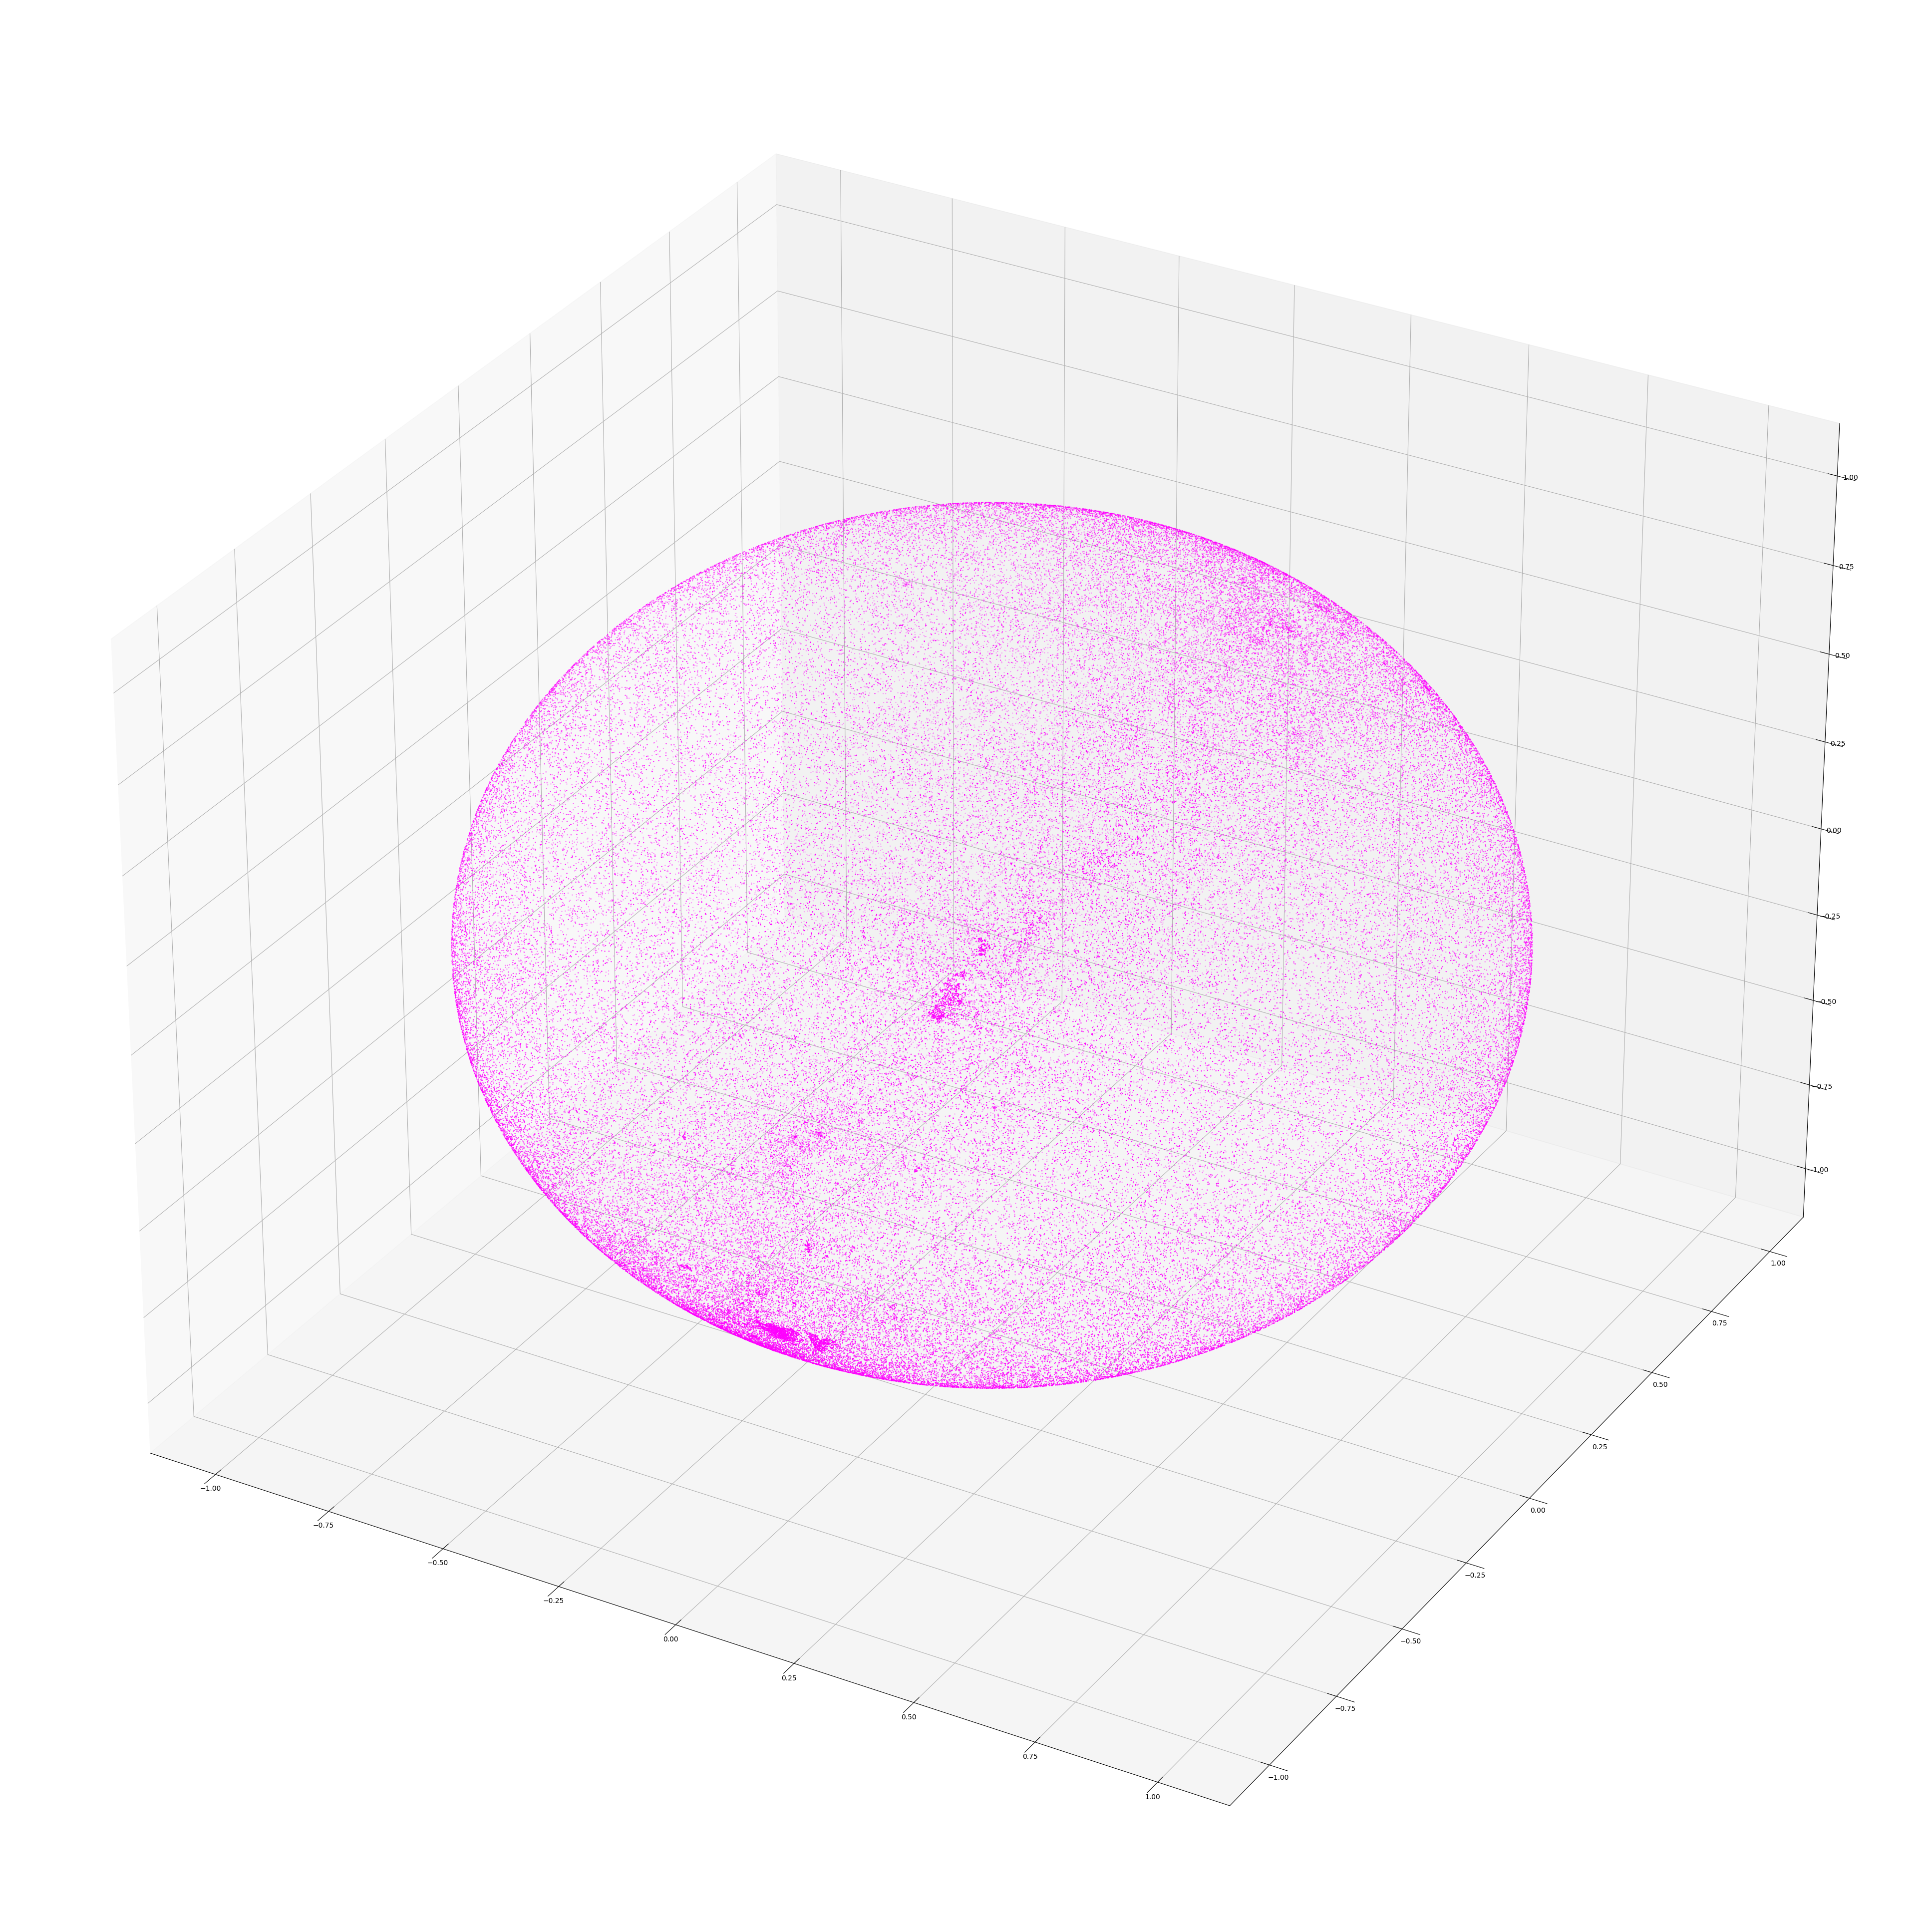

In [9]:
fig = plt.figure( figsize=(50,50), facecolor="white")
ax = fig.add_subplot(111,projection="3d")

xx, yy, zz = df.select("x", "y", "z")
ax.scatter(xx, yy, zz, c='magenta', s=.5) #, marker='*'
ax.set_facecolor("white")
plt.show()

